# Oakland Crime Statistics 2011 to 2016 数据处理

# 代码仓库地址：

# https://github.com/uchihazzj/DM

In [1]:
# 导入处理数据和绘图的包
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from collections import Counter
from pylab import *

print(matplotlib.matplotlib_fname())
print(matplotlib.get_cachedir())
mpl.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

/home/qiuping/tmp/conda/envs/zzj/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc
/home/qiuping/.cache/matplotlib


In [2]:
# 读取数据，看前几条数据，以2011年的数据为例。
df = pd.read_csv('Oakland/records-for-2011.csv')
df.head()

,Agency,Create Time,Location,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time
0,OP,2011-01-01T00:00:00.000,ST&SAN PABLO AV,1.0,06X,1.0,PDOA,POSSIBLE DEAD PERSON,LOP110101000001,2011-01-01T00:28:17.000
1,OP,2011-01-01T00:01:11.000,ST&HANNAH ST,1.0,07X,1.0,415GS,415 GUNSHOTS,LOP110101000002,2011-01-01T01:12:56.000
2,OP,2011-01-01T00:01:25.000,ST&MARKET ST,1.0,10Y,2.0,415GS,415 GUNSHOTS,LOP110101000003,2011-01-01T00:07:20.000
3,OP,2011-01-01T00:01:35.000,PRENTISS ST,2.0,21Y,2.0,415GS,415 GUNSHOTS,LOP110101000005,2011-01-01T00:02:28.000
4,OP,2011-01-01T00:02:10.000,AV&FOOTHILL BLVD,2.0,20X,1.0,415GS,415 GUNSHOTS,LOP110101000004,2011-01-01T00:50:04.000


In [3]:
# 查看数据的整体信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180016 entries, 0 to 180015
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Agency                     180015 non-null  object 
 1   Create Time                180015 non-null  object 
 2   Location                   180016 non-null  object 
 3   Area Id                    179112 non-null  float64
 4   Beat                       179496 non-null  object 
 5   Priority                   180015 non-null  float64
 6   Incident Type Id           180015 non-null  object 
 7   Incident Type Description  180015 non-null  object 
 8   Event Number               180015 non-null  object 
 9   Closed Time                180009 non-null  object 
dtypes: float64(2), object(8)
memory usage: 13.7+ MB


# 1.数据可视化和总结

## 1.1 数据汇总

In [4]:
# 遍历标称属性，输出频率。 有些属性值太多，最多只输出频率前50的数据

def count(attribute,df):
    values = df[attribute]
    dic = {}
    for index,v in enumerate(values):
        if type(v)==str or not np.isnan(v):
            dic[v] = dic.get(v,0) + 1
        else:
            dic['nan'] = dic.get('nan',0) + 1
    dic = Counter(dic).most_common(50)#部分属性值类别太多
    print('%s\n'%(attribute),dic) 
    return dic

for attribute in ['Agency','Location','Area Id','Beat','Priority','Incident Type Id','Incident Type Description','Event Number']:
    count(attribute,df)

Agency
 [('OP', 180015), ('nan', 1)]
Location
 [(' INTERNATIONAL BLVD ', 3866), (' MACARTHUR BLVD ', 3129), (' AV&INTERNATIONAL BLVD ', 3067), (' BROADWAY  ', 2132), (' FOOTHILL BLVD ', 1791), (' TELEGRAPH AV ', 1584), (' BANCROFT AV ', 1319), (' SAN PABLO AV', 1272), (' FRUITVALE AV ', 1141), (' 7TH ST ', 1093), (' AV&MACARTHUR BLVD ', 1063), (' ST&BROADWAY  ', 1025), (' HEGENBERGER RD ', 1024), (' HARRISON ST ', 990), (' HIGH ST ', 987), (' ST&TELEGRAPH AV ', 984), (' 73RD AV ', 976), (' MARKET ST ', 840), (' 14TH ST ', 824), (' AV&FOOTHILL BLVD ', 761), (' WEBSTER ST ', 680), (' W MACARTHUR BLVD', 668), (' AV&BANCROFT AV ', 667), (' ST&MARTIN LUTHER KING', 666), (' ST&SAN PABLO AV', 664), (' E 18TH ST', 662), (' MARTIN LUTHER KING', 626), (' E 12TH ST', 616), (' ST&MARKET ST ', 614), (' EDGEWATER DR ', 611), (' 66TH AV ', 609), (' E 17TH ST', 599), (' 35TH AV ', 594), (' 8TH ST ', 593), (' GRAND AV ', 588), (' HAWTHORNE AV ', 587), (' 15TH ST ', 564), (' ADELINE ST ', 515), (' 82ND 

In [5]:
# Create Time 和 Closed Time 是这个数据集的数值属性，转换为 2011-01-01 00:00:00 和 2011-01-01 00:00:00 之间的差值（单位：秒）方便five-digit泛化
df1 = df.copy()
df1['Create Time'] =  (pd.to_datetime(df1['Create Time'], format='%Y-%m-%dT%H:%M:%S')-pd.to_datetime('2011-01-01T00:00:00', format='%Y-%m-%dT%H:%M:%S')).dt.total_seconds()
df1['Closed Time'] =  (pd.to_datetime(df1['Closed Time'], format='%Y-%m-%dT%H:%M:%S')-pd.to_datetime('2011-01-01T00:00:00', format='%Y-%m-%dT%H:%M:%S')).dt.total_seconds()
df1.head()

,Agency,Create Time,Location,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time
0,OP,0.0,ST&SAN PABLO AV,1.0,06X,1.0,PDOA,POSSIBLE DEAD PERSON,LOP110101000001,1697.0
1,OP,71.0,ST&HANNAH ST,1.0,07X,1.0,415GS,415 GUNSHOTS,LOP110101000002,4376.0
2,OP,85.0,ST&MARKET ST,1.0,10Y,2.0,415GS,415 GUNSHOTS,LOP110101000003,440.0
3,OP,95.0,PRENTISS ST,2.0,21Y,2.0,415GS,415 GUNSHOTS,LOP110101000005,148.0
4,OP,130.0,AV&FOOTHILL BLVD,2.0,20X,1.0,415GS,415 GUNSHOTS,LOP110101000004,3004.0


In [6]:
# 数值属性用五个数字汇总，统计缺失值的个数
def describe(attribute,df):
    values = df[attribute]
    print(values.describe())

for attribute in ['Create Time','Closed Time']:
    describe(attribute,df1)
    print('缺失值的个数：%d\n'% df1[attribute].isnull().sum())

count    1.800150e+05
mean     1.580284e+07
std      8.954285e+06
min      0.000000e+00
25%      8.154167e+06
50%      1.587084e+07
75%      2.340503e+07
max      3.153589e+07
Name: Create Time, dtype: float64
缺失值的个数：1

count    1.800090e+05
mean     1.581037e+07
std      8.955266e+06
min      1.480000e+02
25%      8.160001e+06
50%      1.587613e+07
75%      2.341404e+07
max      3.309569e+07
Name: Closed Time, dtype: float64
缺失值的个数：7



## 1.2 数据可视化

Create Time :


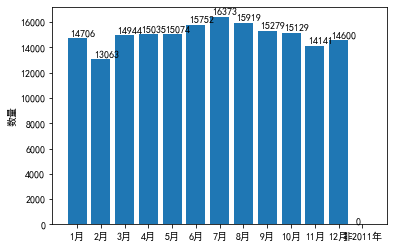

Closed Time :


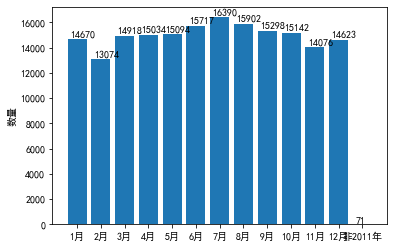

In [7]:
# 绘制数值属性的直方图和箱形图（因为不去掉NAN就不能画图，所以画的时候需要忽略NAN
# 直方图按月显示数据量分布

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2.- 0.3, 1.01*height, '%s' % int(height))

x = [str(i)+'月' for i in range(1,13)]
x.append('非2011年')
d = [31,28,31,30,31,30,31,31,30,31,30,31]
x_end = [pd.to_datetime('2011-'+str(i+1)+'-'+str(d[i])+'T23:59:59',format='%Y-%m-%dT%H:%M:%S') for i in range(12)]
time = [(x_end[i]-pd.to_datetime('2011-01-01T00:00:00', format='%Y-%m-%dT%H:%M:%S')).total_seconds() for i in range(12)]
y = [0]*13

for attribute in ['Create Time','Closed Time']:
    values = df1[attribute]
    print(attribute,':')
    for i in range(12):
        y[i] = (values < time[i] ).sum()
    else:
        y[i+1] = (values > time[11] ).sum()
    for i in range(11):
        y[11-i] -= y[11-i-1]
    autolabel(plt.bar(range(len(y)),y,tick_label=x))
    plt.ylabel('数量')
    plt.show()

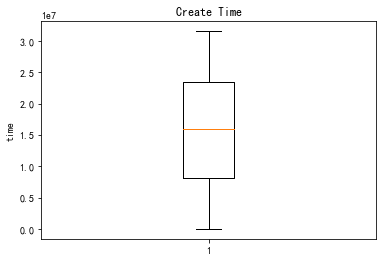

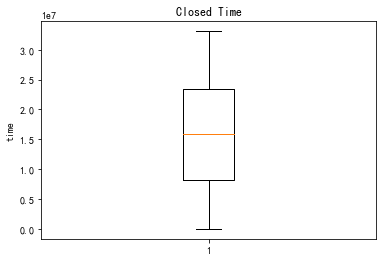

In [8]:
def draw_Box_plot(data,title=None,ylabel=None):
    plt.boxplot(data)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()
for attribute in ['Create Time','Closed Time']:
    draw_Box_plot(df1[attribute].dropna(),title=attribute,ylabel='time')

# 2.缺失数据的处理

## 2.1 消除缺失的部分

In [9]:
# 删除事件编号为空的数据
df2 = df1.copy()
df2 = df2.dropna(subset=['Event Number'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180015 entries, 0 to 180014
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Agency                     180015 non-null  object 
 1   Create Time                180015 non-null  float64
 2   Location                   180015 non-null  object 
 3   Area Id                    179112 non-null  float64
 4   Beat                       179496 non-null  object 
 5   Priority                   180015 non-null  float64
 6   Incident Type Id           180015 non-null  object 
 7   Incident Type Description  180015 non-null  object 
 8   Event Number               180015 non-null  object 
 9   Closed Time                180009 non-null  float64
dtypes: float64(4), object(6)
memory usage: 15.1+ MB


  
## 2.2 用最高频率值填充缺失值  

In [10]:
# 对于Area Id和Beat，使用最高频率值填写
for attribute in ['Area Id','Beat']:
    df2[attribute] = df2[attribute].fillna(df2[attribute].mode()[0])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180015 entries, 0 to 180014
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Agency                     180015 non-null  object 
 1   Create Time                180015 non-null  float64
 2   Location                   180015 non-null  object 
 3   Area Id                    180015 non-null  float64
 4   Beat                       180015 non-null  object 
 5   Priority                   180015 non-null  float64
 6   Incident Type Id           180015 non-null  object 
 7   Incident Type Description  180015 non-null  object 
 8   Event Number               180015 non-null  object 
 9   Closed Time                180009 non-null  float64
dtypes: float64(4), object(6)
memory usage: 15.1+ MB


## 2.3 缺失值通过属性关联填充

如果 Create Time 和 Closed Time 之间存在正相关，您可以计算两个值之间的差值的平均值，并将 Create Time Time 添加为 Closed Time

In [11]:
df2.corr() #计算数据type为数值的属性相关关系

,Create Time,Area Id,Priority,Closed Time
Create Time,1.000000,-0.306732,-0.023756,0.999983
Area Id,-0.306732,1.000000,-0.025422,-0.306700
Priority,-0.023756,-0.025422,1.000000,-0.023764
Closed Time,0.999983,-0.306700,-0.023764,1.000000


In [12]:
df3 = df2[df2['Closed Time'].isnull()]
df3

,Agency,Create Time,Location,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time
153870,OP,26697042.0,47TH EMBARCADERO WEST,1.0,01X,2.0,415,DISTURBANCE-DRINKERS,LOP111105000928,NaN
153890,OP,26700683.0,47TH OAK GROVE AV,1.0,12Y,2.0,SECCK,SECURITY CHECK,LOP111106000032,NaN
153903,OP,26702627.0,47TH AV&SANFORD ST,2.0,35Y,1.0,949,SUSPICIOUS VEHICLE,LOP111106000048,NaN
153906,OP,26703272.0,47TH GRAND AV,1.0,14Y,1.0,242,BATTERY,LOP111106000050,NaN
153908,OP,26703413.0,47TH ST&WOOD ST,1.0,02Y,1.0,5150,MENTALLY ILL,LOP111106000052,NaN
153911,OP,26704605.0,47TH ST&BROADWAY,1.0,08X,2.0,SECCK,SECURITY CHECK,LOP111106000056,NaN


In [13]:
df2['Closed Time'] = df2['Closed Time'].fillna(df3['Create Time'] + np.mean(df2['Closed Time']-df2['Create Time']))
print(df2[df2['Event Number'].isin(df3['Event Number'])])
df2.info()

       Agency  Create Time                Location  Area Id Beat  Priority  \
153870     OP   26697042.0  47TH EMBARCADERO WEST       1.0  01X       2.0   
153890     OP   26700683.0       47TH OAK GROVE AV      1.0  12Y       2.0   
153903     OP   26702627.0     47TH AV&SANFORD ST       2.0  35Y       1.0   
153906     OP   26703272.0          47TH GRAND AV       1.0  14Y       1.0   
153908     OP   26703413.0        47TH ST&WOOD ST       1.0  02Y       1.0   
153911     OP   26704605.0      47TH ST&BROADWAY        1.0  08X       2.0   

       Incident Type Id Incident Type Description     Event Number  \
153870              415      DISTURBANCE-DRINKERS  LOP111105000928   
153890            SECCK            SECURITY CHECK  LOP111106000032   
153903              949        SUSPICIOUS VEHICLE  LOP111106000048   
153906              242                   BATTERY  LOP111106000050   
153908             5150              MENTALLY ILL  LOP111106000052   
153911            SECCK          

## 2.4 缺失值由数据对象之间的相似性填充


对于Agency，数据中只有OP，空缺值为OP； Incident Type Id 和 Incident Type Description 是一一对应的，可以相互填写

但是，由于没有空值，这部分数据处理就完成了。



# 3.新旧数据对比

In [14]:
df2.info(),df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180015 entries, 0 to 180014
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Agency                     180015 non-null  object 
 1   Create Time                180015 non-null  float64
 2   Location                   180015 non-null  object 
 3   Area Id                    180015 non-null  float64
 4   Beat                       180015 non-null  object 
 5   Priority                   180015 non-null  float64
 6   Incident Type Id           180015 non-null  object 
 7   Incident Type Description  180015 non-null  object 
 8   Event Number               180015 non-null  object 
 9   Closed Time                180015 non-null  float64
dtypes: float64(4), object(6)
memory usage: 15.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180016 entries, 0 to 180015
Data columns (total 10 columns):
 #   Column                     Non-Null 

(None, None)